In [1]:
## Reading csv file
import pandas as pd
customers = pd.read_csv('customers.csv')
customers.head(59)

,ID,Visit_Time,Average_Expense,Sex,Age
0,1,3,5.7,0,10
1,2,5,14.5,0,27
2,3,16,33.5,0,32
3,4,5,15.9,0,30
4,5,16,24.9,0,23
5,6,3,12.0,0,15
6,7,12,28.5,0,33
7,8,14,18.8,0,27
8,9,6,23.8,0,16
9,10,3,5.3,0,11


In [16]:
## Removing ID variable
customers = customers.drop(columns = 'ID')
customers.head()

,Visit_Time,Average_Expense,Sex,Age
0,3,5.7,0,10
1,5,14.5,0,27
2,16,33.5,0,32
3,5,15.9,0,30
4,16,24.9,0,23


In [18]:
## Standardizing the data
## Transforming variables to 0-1 scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

## Transforming the variables

customers.iloc[:,1:4] = scaler.fit_transform(customers.iloc[:,1:4])
customers.head()

,Visit_Time,Average_Expense,Sex,Age
0,0.117647,0.041096,0.0,0.051282
1,0.235294,0.342466,0.0,0.487179
2,0.882353,0.993151,0.0,0.615385
3,0.235294,0.390411,0.0,0.564103
4,0.882353,0.698630,0.0,0.384615


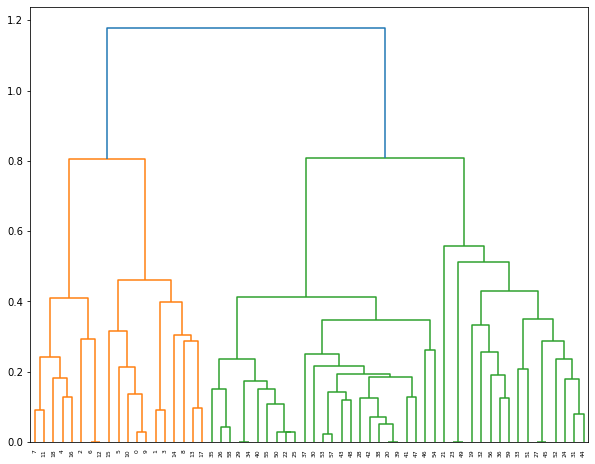

In [21]:
##Hierarchal clustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10, 8))

dend = shc.dendrogram(shc.linkage(customers[['Visit_Time', 'Average_Expense', 'Sex', 'Age']], method = 'average' ))
plt.show()

In [ ]:
## Based on the dendrogram above, there are 2 clusters

In [23]:
from sklearn.cluster import KMeans

##Definign k-means model

four_clusters = KMeans(n_clusters = 4, n_init = 20)

## Applying k-means to data
customers_clusters = four_clusters.fit(customers[['Visit_Time', 'Average_Expense', 'Sex', 'Age']])

##Extracting cluster labels
customers_clusters.labels_

## extracting and appendingn cluster labels
customers['cluster'] = customers_clusters.labels_
customers

,Visit_Time,Average_Expense,Sex,Age,cluster
0,0.117647,0.041096,0.0,0.051282,3
1,0.235294,0.342466,0.0,0.487179,3
2,0.882353,0.993151,0.0,0.615385,1
3,0.235294,0.390411,0.0,0.564103,3
4,0.882353,0.698630,0.0,0.384615,1
5,0.117647,0.256849,0.0,0.179487,3
6,0.647059,0.821918,0.0,0.641026,1
7,0.764706,0.489726,0.0,0.487179,1
8,0.294118,0.660959,0.0,0.205128,3
9,0.117647,0.027397,0.0,0.076923,3


In [ ]:
## Looking at the clusters created, based on clusters 3's results the observations primarily have less visit time than other clusters
## for cluster 0, primarily had observations of ages under age 17
## For cluster 1, primarily had observations that spent at least 10 under the average_expense column
## For cluster 2, primarily had observations that spent higher on expenses than the other clusters 
## For cluster 3, primarily had observations with visit time under 7 